# 図示とシミュレーション

In [1]:
import random
import math
import matplotlib.pyplot as plt

ここでの目的は２つある。第１に，`Matplotlib`（「マットプロットリブ」と読む）はプロットのための代表的なパッケージであり，外部パッケージとしては`Matplotlib`のみを使い（`Pandas`や`Numpy`は使わない）データを図示（プロット）する方法を解説する。第２に，統計学の重要な概念をシミュレーションをおこない，データを可視化し理解を深めることである。

```{margin}
<div name="html-admonition">
Do you want to read in a differnt language? Start
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/><input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="translation" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/>
in English or the language of your choice.
</div>
```

`Matplotlib`は大きなパッケージであり，その中にある`pyplot`モジュールを使うことになる。慣例に沿って`plt`としてインポートしている。

## ライン・プロット

### 説明

次がプロットする際の構文である。
```
plt.plot(＜x軸の値＞,＜y軸の値＞)
```

実際にプロットするために次の値を設定しよう。

In [2]:
x = [1,2,3]
y = [10,30,20]

引数に`x`と`y`を指定するとプロットできる。

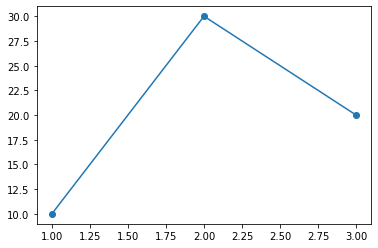

In [3]:
plt.plot(x, y, marker='o')

コードに`marker='o'`が追加されているが，「●」を表示するために使っている。このような引数の使い方は後で詳しく説明するので，ここでは気にしないで読み進めて欲しい。

「●」のマーカーがある点が`x`と`y`の値の組み合わせとして表示されている。
* 左下の「●」の座標は`x`と`y`の`0`番目の値である`x=1`と`y=10`となる。
* 中央上の「●」の座標が`x`と`y`の`1`番目の値である`x=2`と`y=30`となる。
* 右端の「●」はの座標が`x`と`y`の`2`番目の値である`x=3`と`y=20`となる。

`plot()`はデフォルトでそれらの点を直線で結んでおり，ライン・プロットと呼ばれる。曲線を描くにはどうすれば良いかと，単に座標の点を増やすことによりスムーズな曲線を表示することが可能となる。言い換えると，短い直線を使うことにより曲線を描画することになる。

### 値の生成

曲線を描画するためには座標の数を増やす必要がある。ここでは，そのためのコードを考える。

#### `x`軸の値

まず`x`軸の複数の値が要素となるリストを作成するが，次の変数を定義しよう。
* `l`：最小値（lowest value）
    * リストの要素の最小値
* `h`：最大値（highest value）
    * リストの要素の最大値
* `n`：生成する値の数（整数型，number of values）
    * リストに含まれる要素の総数

例えば，次の値を設定しよう。

In [4]:
l = 1
h = 2
n = 5

この値のもとで次の内包表記を使い`1.0`から始まる数字から構成されるリストが作成しよう。

In [5]:
lst = [l + x*(h-l)/n for x in range(n+1)]
lst

[1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

`1.0`から始まり昇順で並んでいる。また要素の数は`n+1`となる。

In [6]:
len(lst) == n+1

True

この手法を使い`x`軸の値を生成するが，関数にまとめた方が使い易いので次の`xvalues`関数を作成する。

In [7]:
def xvalues(l, h, n):
    """引数
        l：最小値（lowest value）
        h：最大値（highest value）
        n：数値の数（整数型，number of values）
    戻り値
        リスト"""
    
    assert isinstance(n, int), "n には整数型を使ってください。"
    
    return [l + x*(h-l)/n for x in range(n+1)]

以前も説明したが，引数などを確認したい場合は次のコードで調べることができるので覚えておこう。

In [8]:
help(xvalues)

Help on function xvalues in module __main__:

xvalues(l, h, n)
    引数
        l：最小値（lowest value）
        h：最大値（highest value）
        n：数値の数（整数型，number of values）
    戻り値
        リスト



この`xvalues`関数を使い，`x`の値を生成しよう。

In [9]:
x = xvalues(-1, 1, 5)
x

[-1.0,
 -0.6,
 -0.19999999999999996,
 0.19999999999999996,
 0.6000000000000001,
 1.0]

#### `y`軸の値


`y`軸の値は，描きたい関数に依存している。例えば，次の２次関数をプロットしたいとしよう。

$$y=x^2$$

まず最初にこの関数を捉える`Python`の関数を作成する。

In [10]:
def quadratic(x):
    return x**2

次に，`x`の値を使い内包表記で`y`の値から構成されるリストを作成する。

In [11]:
y = [quadratic(i) for i in x]
y

[1.0, 0.36, 0.03999999999999998, 0.03999999999999998, 0.3600000000000001, 1.0]

### 曲線のプロット

上で作成した`x`と`y`を使いプロットしよう。

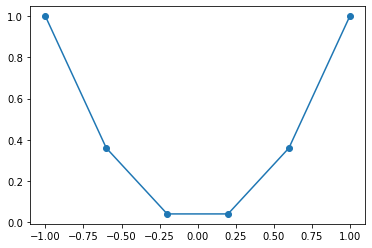

In [12]:
plt.plot(x, y, marker='o')

座標の数が少ないのでスムーズな曲線には見えない。もっと座標を増やしてみよう。

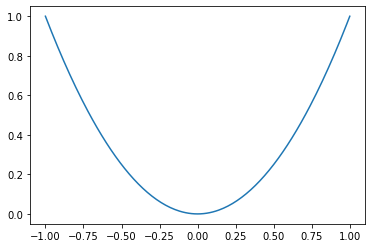

In [13]:
x = xvalues(-1, 1, 200)
y = [quadratic(i) for i in x]

plt.plot(x, y)

$y=x^2$の図らしく見える。

````{hint}
上の２つの図の上に文字が表示されているが，表示したくない場合は最後に`;`を加えるか，次の行に`pass`もしくは`plt.show()`と書くと表示されなくなる。
````

### 重ねてプロット

２つの`y`の値を生成しよう。

In [14]:
y0 = [quadratic(i) for i in x]
y1 = [-quadratic(i) for i in x]

`y0`は`y`と同じであり，`y1`は単にマイナスの符号ついた関数の値である。この２つの関数を重ねてプロットしたいとしよう。コードは簡単で同じ`plt.plot()`をリピートするだけである。

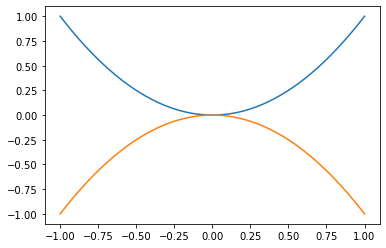

In [15]:
plt.plot(x, y0)
plt.plot(x, y1)
pass

### `plot()`の基本的な引数

`plot()`に引数を使うことによりデータの表示方法を指定できる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `linestyle`：線のスタイル（リストにして列の順番で指定する;`-`，`--`，`-.`，`:`などがある）
* `linewidth` or `lw`：線の幅
* `color` or `c`：色（[参照サイト](https://matplotlib.org/stable/gallery/color/named_colors.html)）
    * `r`又は`red`は赤
    * `k`又は`black`は黒
    * `g`又は`green`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/stable/api/markers_api.html)）
* `markersize`：マーカーの大きさ
* `label`：以下で説明する`ax.legend()`がある場合に有効となる

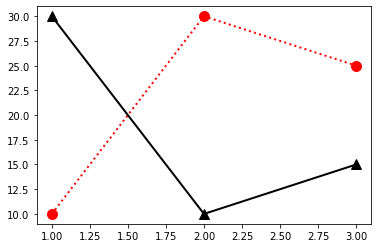

In [16]:
plt.plot([1,2,3], [10,30,25],
         linestyle=':',
         linewidth=2,
         color='r',
         marker='o',
         markersize=10)
plt.plot([1,2,3], [30,10,15],
         linestyle='-',
         linewidth=2,
         color='k',
         marker='^',
         markersize=10)
pass

引数をいちいち書くのが面倒な場合、次の３つを簡略して一緒に指定できる。
* `linestyle`
* `color`
* `marker`

例えば、
* `linestyle=':'`
* `color='red'`
* `marker='o'`

の場合、`:ro`と書くことができる。

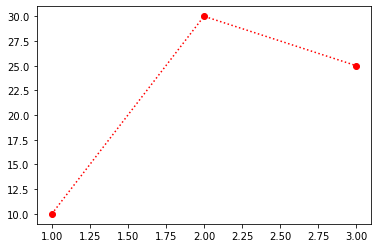

In [17]:
plt.plot([1,2,3], [10,30,25], ':ro')
pass

（注意点）
* `:ro`は文字列
* `:`，`r`，`o`の順番を変えても良い。
* `:`や`:o`のように１つもしくは２つだけを指定しても良い。
* `:ro`は`=`を使う引数の前に置く。

詳細は[参考サイト（英語）](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)を参照。

### その他の「飾り付け」

次の５つは`plt.plot()`の下に付け加えることによって表示できる。
* `plt.title()`：タイトルを設定する。
    * 文字列で指定し、大きさは引数`size`で指定する。
* `plt.xlabel()`：横軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `plt.ylabel()`：縦軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `plt.legend()`：凡例を表示する。
    * `plot()`の引数`label`を使って表示する文字列を指定する。
    * `fontsize`：フォントの大きさを指定する。
* `plt.grid()`：グリッド線が表示される。

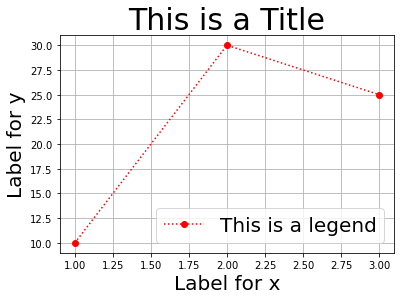

In [18]:
plt.plot([1,2,3], [10,30,25], ':ro', label='This is a legend')
plt.title('This is a Title', size=30)
plt.xlabel('Label for x', size=20)
plt.ylabel('Label for y', size=20)
plt.legend(fontsize=20)
plt.grid()
pass

````{note}
このままで日本語を表示できない。一番簡単な方法は外部パッケージの`japanize_matplotlib`を使うことだろう。まずコンピューターにインストールする必要がある。Google Colaboratoryであれば，**毎回**次のコードを最初に実行してインストールする必要がある。
```
!pip install japanize-matplotlib
```
その後，次を実行すれば他の設定なしに日本語が使える。
```
import japaneze_matplotlib
```
````

## ヒストグラム

基本的には次の構文となる。
```
plt.hist(＜データ＞)
```

まず標準正規分布からランダム変数を10,000個抽出して変数`z0`に割り当てよう。

In [19]:
z0 = [random.gauss(0,1) for _ in range(10_000)]

このデータのヒストグラムを表示してみよう。

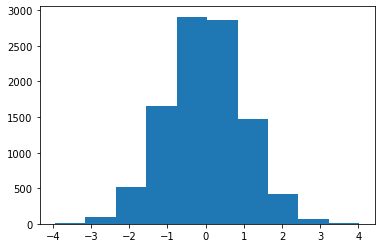

In [20]:
plt.hist(z0)
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `bins`：柱の数
    * 整数型を使えば文字通りの柱の数となる。
    * 区間の値をリストとして設定することができる。例えば，`0`と`1`を等区間に柱を２つ設定する場合は`[0, 0.5, 1]`となる。
* `linewidth`又は`lw`：柱の間隔（デフォルトは`1`）
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`又は`red`：赤
    * `k`又は`black`：黒
    * `g`又は`green`：グリーン
* `edgecolor`又は`ec`：柱の境界線の色
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）
* `density`：縦軸を相対度数にする（デフォルトは`False`）
    * 全ての柱の**面積**の合計が`1`になるように縦軸が調整される。１つの柱の高さが`1`よりも大きくなる場合もある。
* `label`：凡例の表現を指定
    * `ax.legend()`が設定されている場合のみ有効
    
上のヒストグラムに引数をしてしてみよう。

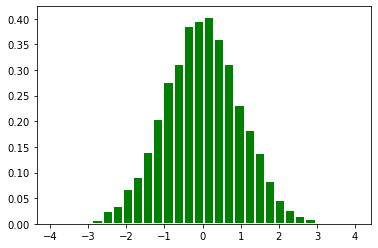

In [21]:
plt.hist(z0,
         bins = 30,
         lw=2,
         color='green',
         ec='white',
#          alpha=0.5,
#          label='values of z'
         density=True)

pass

次に複数のデータを重ねてプロットする場合を考えよう。方法は簡単で，ライン・プロットと同じように`plt.hist()`を続けてコードを書くだけである。まず平均`4`標準偏差`2`の正規分布からのランダム変数を用意しよう。

In [22]:
z1 = [random.gauss(5,2) for _ in range(10_000)]

`z0`と`z1`のヒストグラムを重ねて表示しよう。

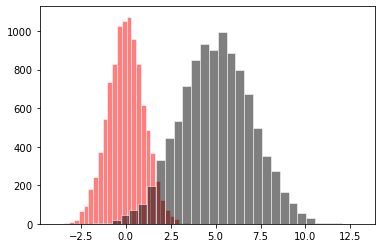

In [23]:
plt.hist(z0,
         bins = 30,
         color='red',
         ec='white',
         alpha=0.5)
plt.hist(z1,
         bins = 30,
         color='black',
         ec='white',
         alpha=0.5)
pass

濃い赤の部分が重なっている部分となる。

その他の「飾り付け」（タイトルなど）はライン・プロットと同じとなる。

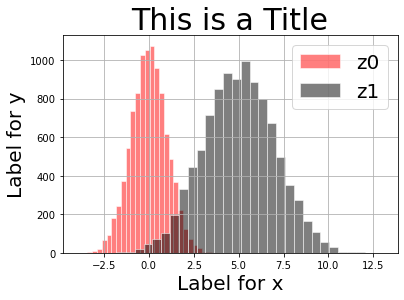

In [24]:
plt.hist(z0,
         bins = 30,
         color='red',
         ec='white',
         alpha=0.5,
         label='z0')
plt.hist(z1,
         bins = 30,
         color='black',
         ec='white',
         alpha=0.5,
         label='z1')
plt.title('This is a Title', size=30)
plt.xlabel('Label for x', size=20)
plt.ylabel('Label for y', size=20)
plt.legend(fontsize=20)
plt.grid()

pass

## 大数の法則

### 大数の法則とは

母集団のパラメータを次の様に表記しよう。
* $\mu$：平均

この母集団から標本$X_1,X_2\cdots X_n$を抽出し（$n$は標本の大きさ），その平均を$\overline{X}_n$とする。

$$
\overline{X}_n=\frac{X_1+X_2+\cdots+X_n}{n}
$$

標本を取るごとに$X_i$，$i=1,2...n$の値は異なるため，$\overline{X}_n$自体もランダム変数となる。ここでは$n$回の試行を考えているが，大数の法則は同じ試行を数多く繰り返した場合の結果に関する法則である。

**＜大数の法則（Law of Large Numbers）＞**<br>
> 母集団の分布がどのようなものであれ（連続型，離散型），$\mu$が有限である限り，$n$が大きくなると$\overline{X}_n$は$\mu$に近づいていく。
>
> $$\lim_{n\rightarrow\infty}\overline{X}_n\;\rightarrow\;\mu$$

実社会とどの様な関係があるのだろうか。ビジネスの中で直接関係するのは保険業だ。自動車事故を考えてみよう。個々人にしてみれば，交通事故が起こると大変だが，滅多に起こらない。一方，保険会社からすると，多くの個人・企業と契約しているため，交通事故は日常茶飯事となる。ここで，全ての顧客の事故の確率が同じであり，顧客数が十分に大きいとすると，顧客の中で交通事故に遭遇する**割合**は，個々の顧客の事故の確率に近づくことになる。これに基づいて保険料を決めてビジネスが成り立つことになる。もちろん，現実はこれより複雑だが，保険業の基本的なアイデアは大数の法則に基づいている。

### コイントス

コインの表を`1`，裏を`0`とするコイントスを考えよう。`1`と`0`はそれぞれ確率$0.5$で発生するベルヌーイ分布に従うと仮定する。従って，以下が成り立つ。
* 平均：$\mu=0.5$

この様なランダム変数は既出の次の関数で表すことができる。

In [25]:
random.randint(0,1)

0

この関数を実行する度に異なる値（`0`又は`1`）が発生することになる。

次に，`20`個のコインを同時に投げる場合を考えよう（`1`個のコインを`20`回投げても同じ）。この場合の`20`が標本の大きさであり，変数`n`（number of coins）に割り当てよう。

In [26]:
n = 20

標本の大きさが`n`の場合の結果は，次の内包表記を使うと簡単に生成することができる。

In [27]:
tosses = [random.randint(0,1) for _ in range(n)]
tosses

[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

`1`（表）が何回発生したかを数えてみよう。この場合，`sum()`関数を使うことができる。

In [28]:
sum(tosses)

6

もしくは，メソッドである`count()`を使うこともできる。引数の値に`1`を指定すると`1`の数を返すことになる。

In [29]:
heads = tosses.count(1)
heads

6

この結果を利用すると平均は次のように計算できる。

In [30]:
heads / n

0.3

この値は上のコードを実行する度に異なる値になる。理論的な平均`0.5`と同じ場合もあれば，そうでない場合もある。

### シミュレーション

上の説明では同時にトスするコインの数を`n=20`として計算したが，ここでは`n=1`から`n=200`までの値を使って平均を計算する。基本的には，上のコードを再利用して，`for`ループとしてまとめることにする。

In [31]:
mean_list = []             #1

for n in range(1,200+1):   #2
    
    tosses = [random.randint(0,1) for _ in range(n)] #3
    
    mean = sum(tosses) / n      #4
    
    mean_list.append(mean) #5

＜コードの説明＞
* `#1`：`for`ループで計算する平均を格納するリスト。
* `#2`：`range(1,200+1)`となっている。`1`枚のコインから`200`枚のコインまでのループ計算となっている。
* `#3`：`n`枚のコインを投げた場合の結果を変数`tosses`に割り当てる。
* `#4`：平均を計算し変数`mean`に割り当てる。
* `#5`：`mean`を`mean_list`に追加する。

`mean_list`をプロットしてみよう。

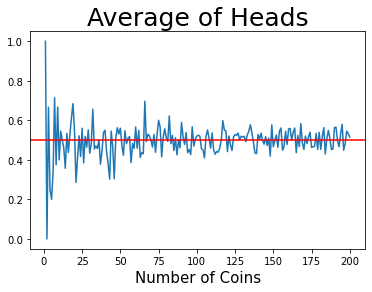

In [32]:
plt.plot(range(1,200+1), mean_list)     #1
plt.title('Average of Heads', size=25)  #2
plt.xlabel('Number of Coins', size=15)  #3
plt.axhline(0.5, color='red')           #4
pass

＜コードの説明＞
* `#1`：ライン・プロットで描画する。`x`軸に`range(1,200+1)`を使っており，自動的に`list(range(1,200+1))`として扱っている。また`range(1,200+1)`を省いて`plt.plot(mean_list)`としても図は表示される。その場合，`x`軸には`mean_list`のインデックス番号が使われることになり，`x`の値は`0`から`199`となる（図では分かりづらいが）。
* `#2`：タイトルの設定。フォントサイズは`25`。
* `#3`：`x`軸のラベルの設定。フォントサイズは`15`。
* `#4`：`plt.axhline()`は横線を引く関数。引数は`y`軸の値（`0.5`），色は赤を指定。

この図から標本の大きさ（同時に投げるコインの数）である`n`が増えると，平均は理論値`0.5`に収束していることが確認できる。

##  中心極限定理

### 中心極限定理とは

母集団（大きさが無限）のパラメータを次の様に表記しよう。
* $\mu$：平均
* $\sigma$：標準偏差

この母集団から標本$X_1,X_2\cdots X_n$を抽出し（$n$は標本の大きさ），その平均を$\overline{X}$とする。

$$
\overline{X}_n=\frac{X_1+X_2+\cdots+X_n}{n}
$$

標本を取るごとに$X_i$，$i=1,2...n$の値は異なるため，$\overline{X}$自体もランダム変数となる。更に，標準化した平均を次の様に定義しよう。

$$
Z_n = \frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}}
$$ (eq:1-6-Zn)

ここで$Z_n$は平均`0`，分散`1`となるランダム変数である。これにより，$Z_n$の**分布型は不明**だが，少なくとも平均と分散の２つのパラメータに関する限り標準正規分布と共通点がある。

**＜中心極限定理（Central Limit Theorem)＞**<br>
> 母集団の分布がどのようなものであれ（連続型，離散型），$\mu$と$\sigma$が有限である限り，$n$が大きくなると$Z_n$の分布は標準正規分布$N(0,1)$に近づいていく。

この驚くべき結果は統計学の金字塔である。ではどこが金字塔なのだろうか。データ分析のためには標本を集める必要がある。例えば，大学生の１日の授業以外の勉強時間（単位は分）を考えてみよう。マイナス時間や24時間以上はあり得ないため，母集団の分布は正規分布ではないことは明らかである。標本の中には驚くほど勉強している人もいれば，アルバイトなどに追われ`0`分の学生も含まれるかも知れない。もしかすると，分布には複数のピークがあるかもしれない（例えば，`0`と`70`分）。いずれにしろ，母集団の分布は未知であるため，仮説検定は不可能のように感じられる。しかし中心極限定理は，超えることはできないように見える壁をいとも簡単に飛び越えさせてくれる。ランダム標本を集め，標本の大きさが十分に大きければ，標本平均は正規分布に従う（近似される）ため仮説検定が可能になるのだ。

ここでの目的は，シミュレーションを使って中心極限定理を視覚的に理解・確認することである。コイントスの例を使い，次のステップで進める。
1. `n`個のコインを同時に投げることを考え，その標準化平均を計算する。
1. 標準化平均を計算するための関数を作成する。
1. コイントスのシミュレーションをおこない，そのヒストグラムをプロットする。
1. コイントスのヒストグラムと標準正規分布を重ねて表示し，中心極限定理の成立を視覚的に確認する。

### コイントス（再考）

大数の法則を説明する際に説明したコイントスを再考しよう。表を`1`，裏を`0`とし，それぞれの確率は$p=0.5$とする。以下が成り立つ。
* 平均：$p=0.5$
* 分散：$p(1-p)=0.5^2$
* 標準偏差：$\sqrt{p(1-p)}=0.5$

`n=20`個のコインを同時に投げる場合，`1`（表）が発生した回数の平均は次のように計算できることを説明した。

In [33]:
n = 20
tosses = [random.randint(0,1) for _ in range(n)]
heads = sum(tosses)
heads / n

0.6

ここまでのコードを利用して，上の式[](eq:1-6-Zn)に従って，この平均を標準化した値を計算してみよう

In [34]:
(heads/n - 0.5) / ( math.sqrt(0.5*0.5)/math.sqrt(n) )

0.8944271909999157

このような値を数多く計算して中心極限定理を考えていくことになる。

### 関数化

上では一回だけのシミュレーションをおこなった。以下では任意の回数のシミュレーションをおこなうために，上のコードを関数にまとめることにする。２つの関数に分けてコードを書くことにしよう。

まず同時に投げるコインの数とその結果のコインの表の数を所与として，平均が標準化された値を計算する関数を作成する。

In [35]:
def standardize(n, h):
    """
    引数：
        n：同時にトスしするコインの数
        h：コインの表（heads）の数
    戻り値：
        コインの表の平均を標準化した値"""
    
    return (h/n - 0.5) / ( math.sqrt(0.5*0.5)/math.sqrt(n) )

この関数は`n`と`h`が与えられれば，標準化された平均を返す。上の数値を使って，この関数を実行してみよう。

In [36]:
standardize(n, heads)

0.8944271909999157

同じ値を返していることが確認できる。

次に，同時にトスするコインの数`n`は所与とするが，関数の中でランダム変数として`1`の数が決まり，その標準化平均を返す関数を作成しよう。

In [37]:
def mean_standardized(n):
    """
    引数：
        n：同時にトスするコインの数
    戻り値：
        コインの表の平均を標準化した値"""
    
    tosses = [random.randint(0,1) for _ in range(n)]
    heads = sum(tosses)
    
    return standardize(n, heads)

`n=20`で実行しよう。

In [38]:
mean_standardized(20)

-1.341640786499874

この値は`20`個のコインを同時に投げた結果の平均を標準化した値である。`mean_standardized()`関数を実行するたびに，コインが投げられ標本が集められるので，標準化平均の値は上の結果とは異なる。実行するたびに異なる値を取るランダム変数を返すことになる。

次に，`20`個の同時コイントスを`30`回おこない，毎回標準化平均を計算するとしよう。このシミュレーションの結果は次の内包表記で生成することができる。

In [39]:
[mean_standardized(20) for _ in range(30)]

[2.23606797749979,
 0.0,
 0.44721359549995837,
 -0.8944271909999157,
 -0.8944271909999157,
 0.0,
 0.0,
 -0.44721359549995787,
 -2.23606797749979,
 1.7888543819998315,
 -0.8944271909999157,
 -0.44721359549995787,
 -0.44721359549995787,
 1.341640786499874,
 0.44721359549995837,
 0.0,
 -1.341640786499874,
 0.0,
 0.0,
 0.8944271909999157,
 0.44721359549995837,
 0.44721359549995837,
 0.44721359549995837,
 0.8944271909999157,
 0.44721359549995837,
 -0.8944271909999157,
 1.341640786499874,
 0.44721359549995837,
 1.341640786499874,
 -1.788854381999832]

ランダム変数なので，実行する度に異なる値が並ぶ。また同じ値が複数回発生していることも確認できるだろう。

### ヒストグラム

では実際にヒストグラムをプロットしてみよう。例として次の数値を使う。
* 同時に投げるコインの数（標本の大きさ）：`n=1`
* シミュレーションの回数（`n`枚の同時コイントスの回数）：`N=30`

標準化平均の唯一の値の数（x軸）：2


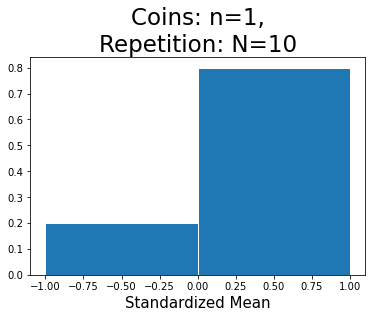

In [40]:
# パラメータの設定
n = 1
N = 10

# コイントスのシミュレーション
tosses = [mean_standardized(n) for _ in range(N)] #1

# 標準化平均の唯一の値の数
unique = len(set(tosses))                         #2
print(f'標準化平均の唯一の値の数（x軸）：{unique}')       #3

# ヒストグラム
plt.hist(tosses,
         bins=unique,
         ec='white',
         density=True)
plt.title(f'Coins: n={n},\nRepetition: N={N}',
          size=23)                                #4
plt.xlabel('Standardized Mean', size=15)          #5
pass

＜コードの説明＞
* `#1`：`n`枚の同時コイントスを`N`回繰り返し，標準化平均を計算したリストを変数`tosses`に割り当てる。
* `#2`：`set()`関数は引数の唯一の値を返すが，`set(tosses)`は標準化平均の唯一の値を返す。更に，`len(set(tosses))`はその数を返しており，その値を変数`unique`に割り当てている。
* `#3`：`unique`の値を表示する。
* `#4`：タイトルを設定する。
* `#5`：横軸のラベルを設定する。

＜注意点＞
* ヒストグラムの柱の幅は階級区間を示すが，シミュレーションの値がそれぞれの区間内で散らばっているのでは**ない**。左の柱にある値は`-1.0`のみであり，右の柱にある値は`1.0`のみである。その２つの数が「標準化平均の唯一の値の数」である。

````{note}
棒グラフとして表示したい場合は`plt.bar()`を使うことができる。
```
n = 1
N = 10
tosses = [mean_standardized(n) for _ in range(N)]
unique = sorted(list(set(tosses)))
count_on_y_axis = [tosses.count(i) for i in unique]
xlabel = [str(i) for i in unique]
plt.bar(xlabel, count_on_y_axis)
plt.title(f'Coins: n={n}, Repetition: N={N}', size=23)
plt.xlabel('Standardized Mean', size=15)
plt.show()
```
````

### ヒストグラムの関数化

ヒストグラムを描くことができたが，`n`と`N`が異なる値を取る度に上のコードをコピペして使うの面倒なので，関数としてまとめよう。

In [41]:
def draw_hist(n, N=10_000):   #1
    
    # コイントスのシミュレーション
    tosses = [mean_standardized(n) for _ in range(N)]

    # 標準化平均の唯一の値の数
    unique = len(set(tosses))
    print(f'標準化平均の唯一の値の数（x軸）：{unique}')

    # ヒストグラム
    plt.hist(tosses,
             bins=unique,
             ec='white',
             density=True)
    plt.title(f'Coins: n={n},\n Repetition: N={N}',
              size=23)
    plt.xlabel('Standardized Mean', size=15)
    
    return plt.show()         #2

この関数の中身は上のコードと同じとなる。違いは次の２点だけである。
* `#1`：関数名を`draw_hist`として，引数は`n`と`N`。ただし，`N`のデフォルトの値を`10_000`
* `#2`：`plt.show()`とは，文字通りこの行の「上で作成された図を表示する」ことを意味している。即ち，「図の表示」を返している。

### シミュレーション

これでシミュレーションの準備は整った。`n`（と`N`）の数値を変えてプロットしてみよう。

標準化平均の唯一の値の数（x軸）：2


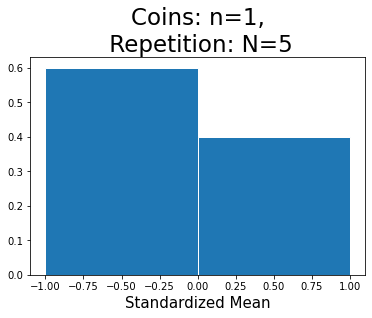

標準化平均の唯一の値の数（x軸）：2


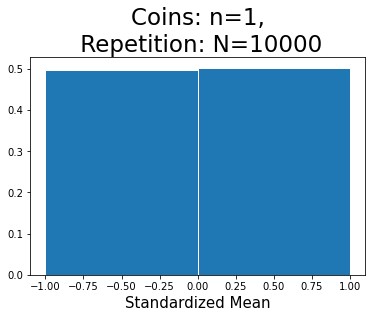

In [42]:
draw_hist(1, 5)
draw_hist(1)

`N`が小さい（`10`）とランダムな影響が強く現れるが，大きくなると（`10000`）大数の法則によって`-1`と`1`の割合は`0.5`に近づいている。一方で，`N`が大きくなっても，分布は標準正規分布とは大きく異なっている。

標準化平均の唯一の値の数（x軸）：3


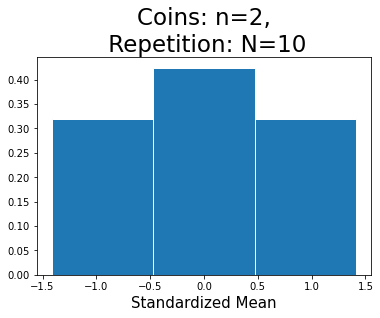

標準化平均の唯一の値の数（x軸）：3


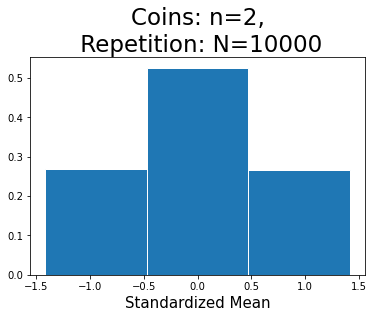

In [43]:
draw_hist(2,10)
draw_hist(2)

`N`が大きくなると，大数の法則によって左右対称の分布となっている。しかし，依然として標準正規分布とは異なっている。

標準化平均の唯一の値の数（x軸）：8


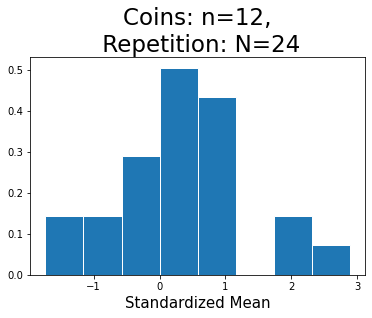

標準化平均の唯一の値の数（x軸）：13


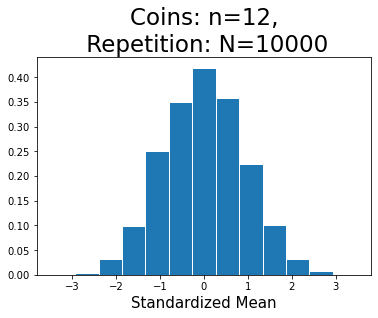

In [44]:
draw_hist(12,24)
draw_hist(12)

`N`が小さいとランダムな要素が際立ち明確ではないが，`n`増加すると標準正規分布に近づいていることが分かる。

標準化平均の唯一の値の数（x軸）：17


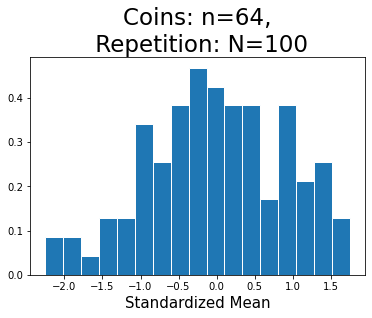

標準化平均の唯一の値の数（x軸）：31


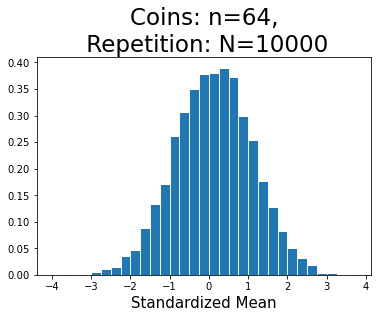

In [45]:
draw_hist(64,100)
draw_hist(64)

標準正規分布に大きく近づいたことが確認できる。

更に`n`が増加すると，分布は標準正規分布に収束していくことになる。次のコードは`n=1000`と`N=10_000`の下でのヒストグラムと標準正規分布を重ねてプロットしている。標準正規分布の近似としては十分な重なり具合と言っていいだろう。

標準化平均の唯一の値の数（x軸）：109


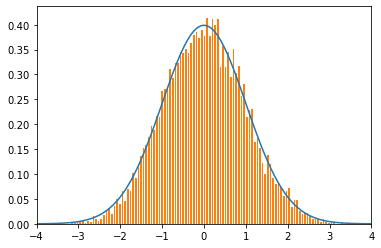

In [46]:
# 標準正規分布 ------------------------------------
from scipy.stats import norm
l = -4
h = 4
m = 100
x = [l + k*(h-l)/m for k in range(m+1)]
plt.plot(x, norm.pdf(x,0,1))

# コイントスのシミュレーション -------------------------
n = 1000
N = 10_000
tosses = [mean_standardized(n) for _ in range(N)]
unique = len(set(tosses))
print(f'標準化平均の唯一の値の数（x軸）：{unique}')
plt.hist(tosses,
         bins=[standardize(n+1, h) for h in range(n+1+1)],
         ec='white', density=True)
# plt.title(f'Coins: n={n},\n Repetition: N={N}',size=23)
# plt.xlabel('Standardized Mean', size=15)
plt.xlim([-4,4])
pass